# Pet Salon Tutorial

## Basic objects

### Polytopes

Pet Salon makes use of the polytope and polyhedra classes built into sage. You can define polytopes in several ways.

The `polytopes` object lets you construct several standard polytopes; see [the documentation](https://doc.sagemath.org/html/en/reference/discrete_geometry/sage/geometry/polyhedron/library.html). For example:

In [1]:
dodecahedron = polytopes.dodecahedron()
dodecahedron.plot()

Graphics3d Object

The `Polyhedron` class lets you construct a convex polytope in any dimension from its vertices.

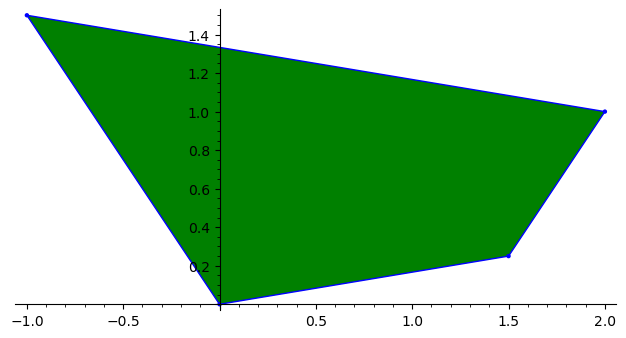

In [2]:
p = Polyhedron(vertices=[(0, 0), (3/2,1/4), (2, 1), (-1, 3/2)])
p.plot()

For more about constructing polytopes, see this [brief introduction](https://doc.sagemath.org/html/en/thematic_tutorials/geometry/polyhedra_quicktutorial.html) or this [longer introduction](https://doc.sagemath.org/html/en/thematic_tutorials/geometry/polyhedra_tutorial.html).

### Disjoint unions of polytopes

The domains and codomains of our dynamical systems will be disjoint unions of polytopes. The easiest way to create a finite disjoint union of polytopes is to use the function `finite_polytope_union`, which constructs the union from a dimension, a field, and a dictionary mapping labels (names) to polytopes.

In [3]:
from pet_salon import finite_polytope_union

In [4]:
labels_to_polytopes = { # Construct a dictionary
    0: Polyhedron(vertices=[(0, 0), (2,0), (2,2)]),
    1: Polyhedron(vertices=[(0, 0), (2,2), (0,2)]),
    2: Polyhedron(vertices=[(0, 2), (2,2), (1,3)])}

In [5]:
u0 = finite_polytope_union(2, QQ, labels_to_polytopes)
u0

Disjoint union of 3 nonoverlapping polyhedra in QQ^2

Note that it mentions that the polytope is *nonoverlapping*, by which we mean pairs of distinct polytopes in the union have non-intersecting interiors. This property of a union makes working with the union easier.

We can plot a polytope, which by default is done by choosing random colors, one for each label.

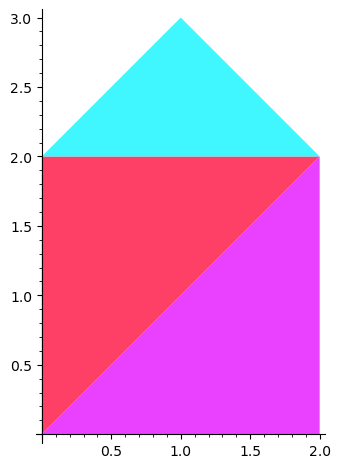

In [6]:
u0.plot()

### Points

Polytope unions contain points, represented by a pair consisting of the label of the containing polytope and the coordinates of the point.

We can construct the set of points in a `PolytopeUnion` with the `point_set` method:

In [7]:
PS = u0.point_set()
PS

Set of points in disjoint union of 3 nonoverlapping polyhedra in QQ^2

The bottom triangle has label `0`. So we can construct a point in it via:

In [8]:
point0 = PS(0, (3/2, 1/2))
point0

Point(0, (3/2, 1/2))

A shortcut is to use the `point` method of a polytope union:

In [9]:
u0.point(0, (3/2, 1/2))

Point(0, (3/2, 1/2))

Because the polytope union is non-overlapping, we can (up to some issues along the edges) construct a point from the position (coordinates) alone. To do this, we skip the label and simply call:

In [10]:
u0.point((3/2, 1/2))

Point(0, (3/2, 1/2))

Along the common edges there are multiple representatives of a position. You can iterate through all possible represetatives by setting the `all` parameter to `True`:

In [11]:
for point in u0.point((1,2), all=True):
    print(point)

Point(1, (1, 2))
Point(2, (1, 2))


## Basic maps

### Immersions

An *immersion* is a continuous map from one disjoint union of polytopes to another that acts trivially on positions (coordinates in ${\mathbb R}^d$).

Consider the following disjoint union of polytopes, which we define using the rectangle function in `pet_salon`. Calling `rectangle(QQ, a, b, c, d, e, f)` will produce the rectangular box $[a, b] \times [c, d] \times [e, f]$ with vertices in ${\mathbb Q}$. Any even number of coordinates can be used, and the dimension will be half that number.

In [12]:
from pet_salon import rectangle

In [13]:
two_squares = finite_polytope_union(2, QQ, {
    0 : rectangle(QQ, 0, 2, 0, 2),
    1 : rectangle(QQ, 1, 3, 1, 3),
})
two_squares

Disjoint union of 2 polyhedra in QQ^2

Note the printout does not claim these squares are "nonoverlapping" because they overlap:

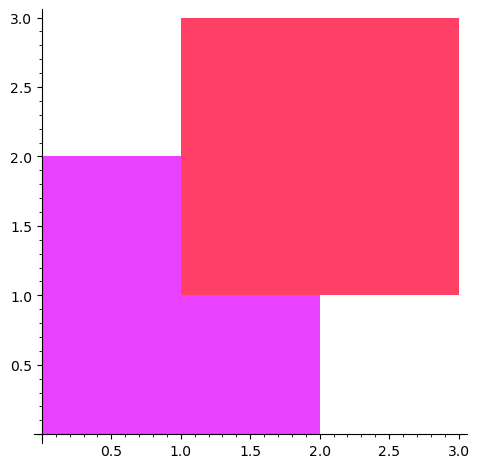

In [14]:
two_squares.plot()

To construct the collection of all immersions into `two_squares`, we can import `Immersions` and then construct the collection:

In [15]:
from pet_salon import Immersions
I = Immersions(two_squares)
I

Immersions into disjoint union of 2 polyhedra in QQ^2

Now we define a disjoint union of three squares:

In [16]:
three_squares = finite_polytope_union(2, QQ, {
    0 : rectangle(QQ, 0, 1, 0, 1),
    1 : rectangle(QQ, 1, 2, 1, 2),
    2 : rectangle(QQ, 2, 3, 2, 3),
})
three_squares

Disjoint union of 3 nonoverlapping polyhedra in QQ^2

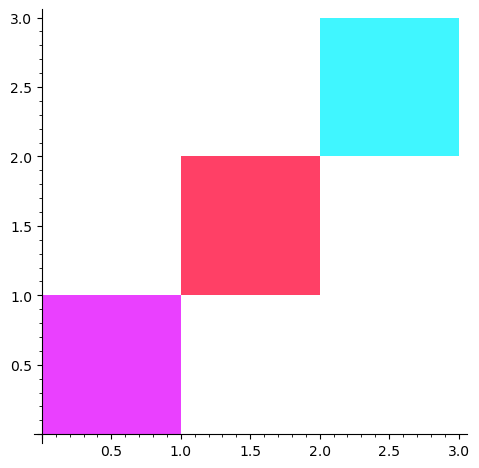

In [17]:
three_squares.plot()

Because `two_squares` has overlaps, there are two ways to immerse `three_squares` into it. Namely the middle square (the one with label `1`) can be immersed in either of the two squares. Here we define one of the two immersions into `two_squares` using `I` the collection of all immersions defined above.

In [18]:
immersion0 = I(three_squares, {0:0, 1:0, 2:1})
immersion0

Immersion of disjoint union of 3 nonoverlapping polyhedra in QQ^2 into disjoint union of 2 polyhedra in QQ^2

The dictionary `{0:0, 1:0, 2:1}` sends a label for one of the three squares to the label of the larger square into which it immerses. For example `1:0` indicates that square $1$ (which is $[1, 2]^2$) will immerse into the large square in `two_squares` with label $0$ (namely $[0, 2]^2$). This dictionary is called the `ambient_labels` dictionary and is accessible from immersion0:

In [19]:
immersion0.ambient_labels()

{0: 0, 1: 0, 2: 1}

We use the word *ambient* to indicate something happening in the codomain for an immersion. The `ambient_labels` dictionary sends labels from the domain to the corresponding ambient label.

An immersion also determines *subunions* of the domain. The subunion associated to an ambient label is the disjoint union of polytope that map into the corresponding ambient polytope.

These are the polytopes which map into the polytope with ambient label `0`:

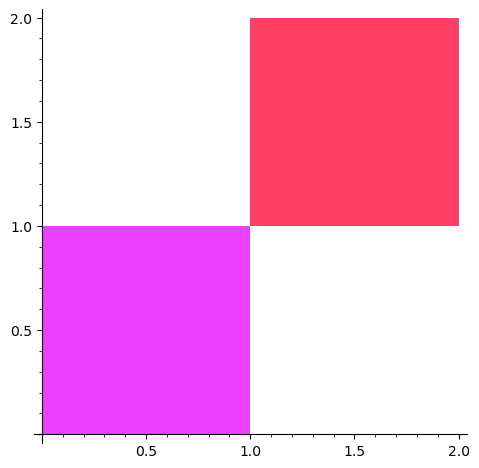

In [20]:
immersion0.subunion(0).plot()

The subunion information is largely combinatorical. This combinatorial information can be found via a call to the `subunion_labels` method, which returns a dictionary mapping an ambient label to the collection of labels of the domain of the immersion that map into the polytope with the given ambient label.

In [21]:
immersion0.subunion_labels()

{0: [0, 1], 1: [2]}

The other immersion of `three_squares` into `two_squares` is defined below:

In [22]:
immersion1 = I(three_squares, {0:0, 1:1, 2:1})
immersion1

Immersion of disjoint union of 3 nonoverlapping polyhedra in QQ^2 into disjoint union of 2 polyhedra in QQ^2

Despite printing the same, the immersions are different:

In [23]:
immersion0 == immersion1

False

You can tell they are different because of their actions on points.

In [24]:
point = three_squares.point((3/2, 3/2))
point

Point(1, (3/2, 3/2))

In [25]:
immersion0(point)

Point(0, (3/2, 3/2))

In [26]:
immersion1(point)

Point(1, (3/2, 3/2))

Here the square with label `1` of `three_squares` immerses into square `0` of `two_squares` under `immersion0` and immerses into square `1` of `two_squares` under `immersion1`.

### Special immersions

An injective immersion is called an `embedding`. Here *injective* means that it is one-to-one except on a set of measure zero, or equivalently, the images of the interiors of polytopes in the domain are non-intersecting in the codomain.

In addition, immersions and embeddings can be either surjective or not. There are parents for all these types of maps into a codomain.

In [27]:
from pet_salon import Immersions, Embeddings, SurjectiveImmersions, SurjectiveEmbeddings

In [28]:
I = Immersions(two_squares)
I

Immersions into disjoint union of 2 polyhedra in QQ^2

In [29]:
E = Embeddings(two_squares)
E

Embeddings into disjoint union of 2 polyhedra in QQ^2

In [30]:
SI = SurjectiveImmersions(two_squares)
SI

Surjective immersions into disjoint union of 2 polyhedra in QQ^2

In [31]:
SE = SurjectiveEmbeddings(two_squares)
SE

Surjective embeddings into disjoint union of 2 polyhedra in QQ^2

The immersions we defined were actually embeddings, so it would have been better to define them as embeddings, which would be done in the same way:

In [32]:
embedding0 = E(three_squares, {0:0, 1:0, 2:1})
embedding0

Embedding of disjoint union of 3 nonoverlapping polyhedra in QQ^2 into disjoint union of 2 polyhedra in QQ^2

You can check that these maps were properly defined and satisfy the definitions using `TestSuite` which is built into Sage. (Read more about `TestSuite` in the [sage reference](https://doc.sagemath.org/html/en/reference/misc/sage/misc/sage_unittest.html#sage.misc.sage_unittest.TestSuite).) 

In [33]:
TestSuite(embedding0).run()

Because nothing was printed, there were no errors. We do see errors however if we check this:

In [34]:
poorly_defined_surjective_embedding = SE(three_squares, {0:0, 1:0, 2:1})

In [35]:
TestSuite(poorly_defined_surjective_embedding).run()

Failure in _test_volume:
Traceback (most recent call last):
  File "/home/pat/Git/sagemath/sage/src/sage/misc/sage_unittest.py", line 297, in run
    test_method(tester=tester)
  File "/home/pat/Git/sagemath/sage/local/var/lib/sage/venv-python3.11/lib/python3.11/site-packages/pet_salon/immersion.py", line 496, in _test_volume
    test_pair(ambient_label, subunion)
  File "/home/pat/Git/sagemath/sage/local/var/lib/sage/venv-python3.11/lib/python3.11/site-packages/pet_salon/immersion.py", line 491, in test_pair
    assert subunion.volume() >= self.parent().ambient_union().polytope(ambient_label).volume(), \
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: The surjectivity axiom is violated: The volume of the subunion associated to the ambient label 0 is not at least as large as the ambient polytope's volume
------------------------------------------------------------
The following tests failed: _test_volume


The error indicates that it was not surjective. If it was surjective, the polytopes mapping into a fixed polytope in the codomain would both have disjoint interiors and their volumes would sum to the volume of the ambient polytope. The volume check fails in this case.

### Partitions

Surjective embeddings are important because the inverse of a surjective immersion is a *partition*: A map that cuts each polytope in the union into subpolytopes.

For example the polytope union `u0` from above is naturally a partition of a pentagon.

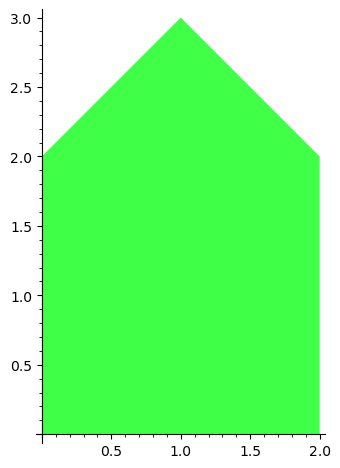

In [36]:
pentagon = Polyhedron(vertices=[(0,0), (2,0), (2,2), (1,3), (0,2)])
pentagon_union = finite_polytope_union(2, QQ, {5: pentagon})
pentagon_union.plot()

Here we define the surjective embedding of `u0` into `pentagon_union`.

In [37]:
se = SurjectiveEmbeddings(pentagon_union)(u0)
se

Surjective embedding of disjoint union of 3 nonoverlapping polyhedra in QQ^2 into disjoint union of 1 nonoverlapping polyhedra in QQ^2

Here we check to make sure it really is a surjective embedding:

In [38]:
TestSuite(se).run()

The inverse of `se` is a partition. In Sage you can write the inverse with a tilde in front:

In [39]:
partition = ~se
partition

Partition of disjoint union of 1 nonoverlapping polyhedra in QQ^2 into 3 subpolytopes

As it is the inverse of a surjective embedding, it is also a mapping. Here we show the domain and codomain:

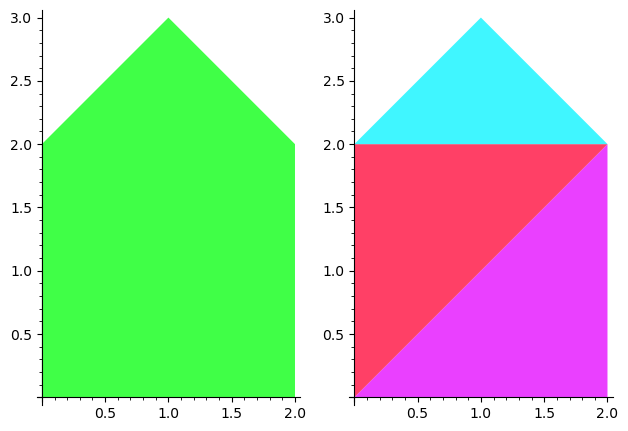

In [40]:
partition.plot()

As a partition is a map, it can act on points:

In [41]:
point = pentagon_union.point((1/2, 1))
point

Point(5, (1/2, 1))

In [42]:
partition(point)

Point(1, (1/2, 1))

Above we see that the point is sent to the triangle with label $1$. This is the middle one in the codomain.

Some points lie on the common border between two of the subpolytopes. For example $(1, 1)$. A partition just chooses one (the first polygon it finds that contains the point):

In [43]:
point1 = pentagon_union.point((1, 1))
partition(point1)

Point(0, (1, 1))

If you want all the possible images, you can pass `all=True` to the map. But, in this case a generator is returned. Below we convert this generator to a list.

In [44]:
list(partition(point1, all=True))

[Point(0, (1, 1)), Point(1, (1, 1))]

### Affine homeomorphism

An *affine homeomorphism* between disjoint unions of polytopes is a label-respecting homeomorphism between disjoint unions that is an affine bijection between the individual polytopes in the unions. Note that the two unions must have the same label set for this to work.

You can get the *affine group* from a `pet_salon` as follows:

In [45]:
from pet_salon import AffineGroup as AG

In [46]:
G = AffineGroup(2, QQ)

We can pass $G$ a matrix $A \in \mathrm{GL}(2, {\mathbb R})$ and a vector $b$ to construct the map $x \mapsto Ax + b$. The objects passed can be lists rather than formal matrices or vectors. For example:

In [47]:
g0 = G([ [ 0, -1/2 ],
         [ 1,  1/2 ] ], [2, 0])
g0

      [   0 -1/2]     [2]
x |-> [   1  1/2] x + [0]

In [48]:
g1 = G([ [ 1/2, -1 ],
         [ 1/2,  1 ] ], [2, 0])
g1

      [1/2  -1]     [2]
x |-> [1/2   1] x + [0]

In [49]:
g2 = G([ [ 1, -1 ],
         [ 0,  2 ] ], [2, -4])
g2

      [ 1 -1]     [ 2]
x |-> [ 0  2] x + [-4]

Now we construct the collection of affine homeomorphisms in dimension $2$ over ${\mathbb Q}$.

In [50]:
from pet_salon import AffineHomeomorphisms
AH = AffineHomeomorphisms(2, QQ)
AH

Collection of label-respecting affine homeomorphisms of disjoint unions of 2-dimensional polytopes defined over Rational Field

To construct an affine homeomorphism, we just need to specify the domain and how the polytope of each label is moved. We do the later in a dictionary.

In [51]:
aff = AH(u0, {0:g0, 1:g1, 2:g2})
aff

Affine homeomorphism between disjoint unions of 3 polytopes

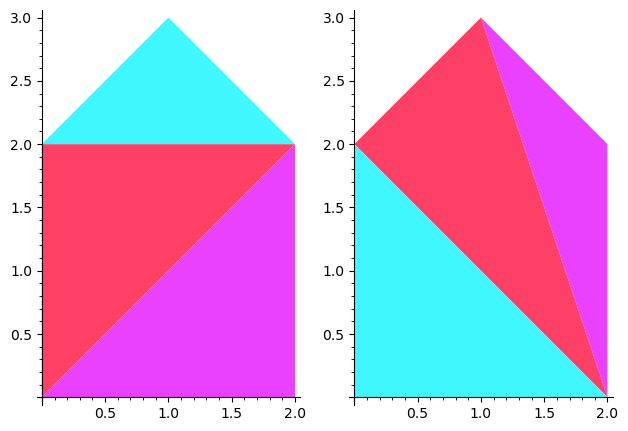

In [52]:
aff.plot()

In the construction, we automatically compute the codomain, though this can also be provided to the constructor.

In [53]:
aff.codomain()

Disjoint union of 3 nonoverlapping polyhedra in QQ^2

You can recover the dictionary of affine maps using `aff.affine_mapping()`:

In [54]:
d = aff.affine_mapping()
d[1]

      [1/2  -1]     [2]
x |-> [1/2   1] x + [0]

## Piecewise affine maps

A *piecewise affine map* is a map between disjoint polytope unions that can be written as a composition of:

* Immersions,
* Partitions, and
* Affine homeomorphisms.

Assuming the domains and codomains match up, we can compose these objects and what is returned will be a piecewise affine map (unless there is a simpler type that can realize the composition; E.g., a composition of immersions is an immersion).

For example, the codomain of the partition is the same as the domain of our affine map above:

In [55]:
partition.codomain() == aff.domain()

True

So, we can compose them:

In [56]:
f_1 = aff * partition
f_1

Piecewise affine map from disjoint union of 1 nonoverlapping polyhedra in QQ^2 to disjoint union of 3 nonoverlapping polyhedra in QQ^2

Piecewise affine maps are a bit more complex. Every piecewise affine map $f$ can be written as a composition
$f = i * a * p$, where $p$ is a partition, $a$ is an affine homeomorphism and $i$ is an immersion. (Internally this is how Pet Salon is storing the PAM.) This factorization is depicted by the plot function.

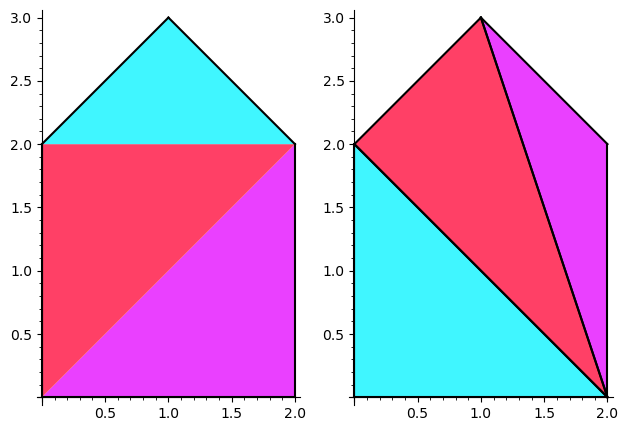

In [57]:
f_1.plot()

On the left, the domain of $f$ is drawn with a black outline. The codomain of the partition function $p$ is also drawn on the left. On the right, the codomain of $f$ is drawn with a black outline, and the domain of the immersion $i$ is drawn. The domain of $i$ is also the codomain of the affine homeomorphism. In this case, all the polygons on the right are outlined, and this indicates that the immersion $i$ is trivial.

If we want to do dynamics, we want the domain and codomain to match. This is not the case for $f_1$:

In [58]:
f_1.domain() == f_1.codomain()

False

But there is an obvious surjective embedding from the codomain of $f_1$ into the pentagonal domain. We construct this here:

In [59]:
SE = SurjectiveEmbeddings(pentagon_union)
se = SE(f_1.codomain())
se

Surjective embedding of disjoint union of 3 nonoverlapping polyhedra in QQ^2 into disjoint union of 1 nonoverlapping polyhedra in QQ^2

We can then define `f` by post-composing `f_1` with `se`:

In [60]:
f = se * f_1
f

Piecewise affine map from disjoint union of 1 nonoverlapping polyhedra in QQ^2 to disjoint union of 1 nonoverlapping polyhedra in QQ^2

In [61]:
f.domain() == f.codomain()

True

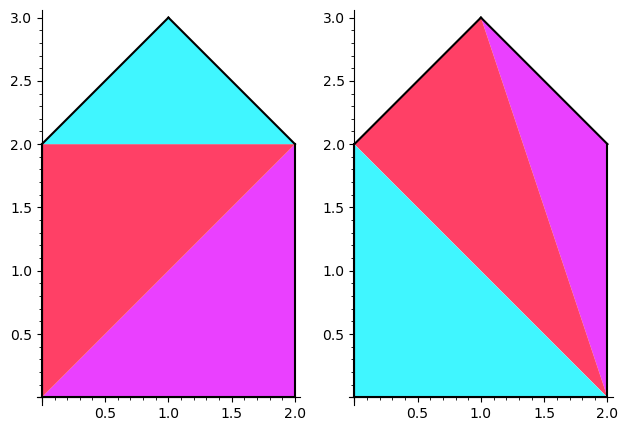

In [62]:
f.plot()

Powers of $f$ are also PAMs. Currently you have to compute powers by multiplication (rather than power notation).

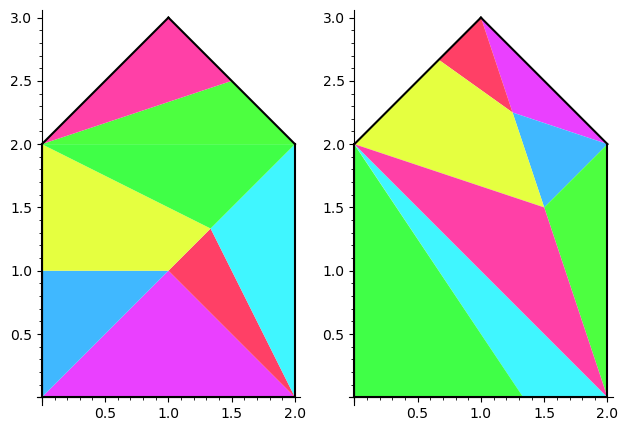

In [63]:
f_squared = f*f
(f_squared).plot()

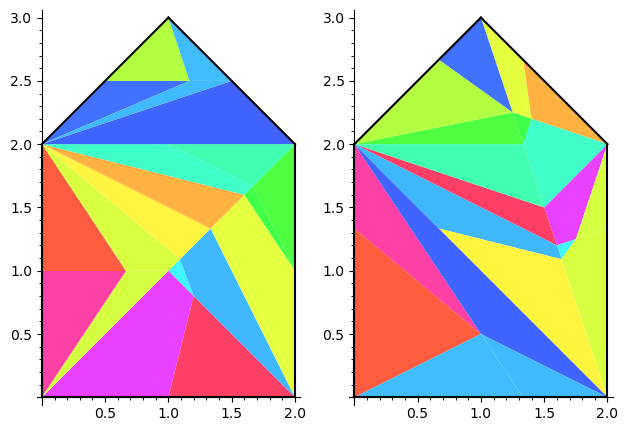

In [64]:
f_4 = f_squared * f_squared
(f_4).plot()

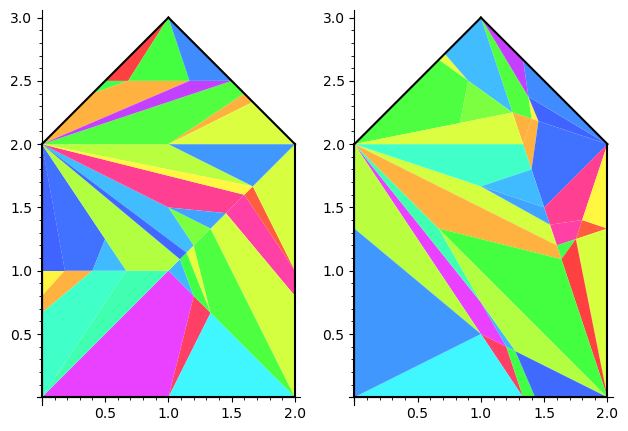

In [65]:
f_6 = f_squared * f_4
(f_6).plot()

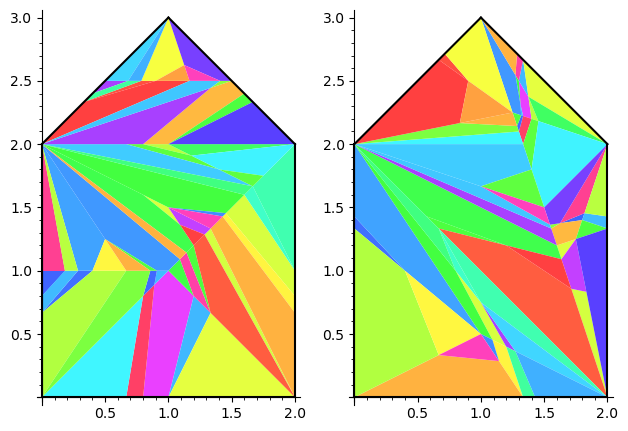

In [66]:
f_8 = f_4 * f_4
(f_8).plot()

As we take greater and greater powers, the algorithms get bogged down. It would be nice to speed things up.

We will now compute the orbit of a point, say:

In [67]:
point = pentagon_union.point((1/3 + 1/100, 1/4 + 1/99))

There is a class for storing and manipulating orbits:

In [68]:
from pet_salon import Orbit, StopCriterion

Here we create an object for storing the orbit of `point`. We declare a stop criterion of `PERIODIC`. This means that we will stop iteration if the point is discovered to be periodic.

In [69]:
orbit = Orbit(f, point, StopCriterion.PERIODIC)

In [70]:
orbit.iterate(1000)

False

The `False` returned above means that we have not seen something that caused iteration to stop. So, `point` is either not periodic or has period greater than 1000. Below we plot the orbit with domain for the affine homeomorphism of `f`.

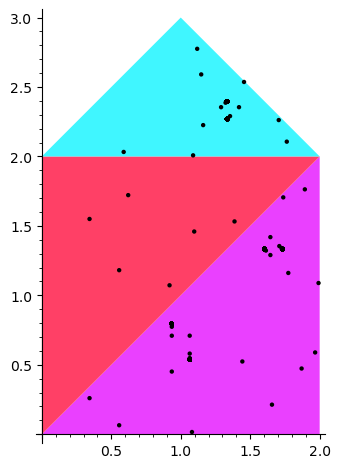

In [71]:
f.affine_homeomorphism().domain().plot() + point2d(orbit.orbit(position_only=True), color='black')

The orbit seems surprisingly sparse. This suggests it is being attracted by an attractor, or maybe a periodic orbit. We will investigate. Below we convert the list of points in the orbit into a list.

In [72]:
points = list(orbit.orbit(position_only=True))

This gives the last 10 elements of the list:

In [73]:
points[-10:]

[(8673440221749309582415202620593031385806492448389960797313435881721493151778287752796440401304747092429/5413445543837954512821943012116112879249094341460700780153782250864633673018455409978195113132058214400, 160398386484087541120650163321958900125899091598835578671223177803396553274620901036390966315023944671/120298789863065655840487622491469175094424318699126684003417383352547414955965675777293224736267960320),
 (320796772968175082241300326643917800251798183197671157342446355606793106549241802072781932630047896609/240597579726131311680975244982938350188848637398253368006834766705094829911931351554586449472535920640, 24564807835282558515259662590674213277278444018727522634831914764595831200914516052230474286785571695053/10826891087675909025643886024232225758498188682921401560307564501729267346036910819956390226264116428800),
 (168611/158400, 2911025659930740463971890542209761760282066652884719514216785761137296508840694412317693834257338837453/541344554383795451282194301211611287924

Well that wasn't very useful. How about we convert them to decimals and print them:

In [74]:
for v in points[-10:]:
    print(v.n())

(1.60220328282828, 1.33333333333333)
(1.33333333333333, 2.26886994949495)
(1.06446338383838, 0.537739898989899)
(1.73113005050505, 1.33333333333333)
(1.33333333333333, 2.39779671717172)
(0.935536616161616, 0.795593434343434)
(1.60220328282828, 1.33333333333333)
(1.33333333333333, 2.26886994949495)
(1.06446338383838, 0.537739898989899)
(1.73113005050505, 1.33333333333333)


The last point seems very close to $(\sqrt{3}, \frac{4}{3})$, and it seems to repeat with period six. Unfortunately, $\sqrt{3} \not \in {\mathbb Q}$, so we can't define this point to check if it is period six.

To deal with this, we can change fields. For efficiency reasons, we choose to use a `NumberField` rather than `AA` (the field of real algebraic numbers). First, we define square root of 3 as an element of `AA`:

In [75]:
sqrt3_AA = AA(sqrt(3))

We use this element to construct a the number field $F = {\mathbb Q}(\sqrt{3})$:

In [76]:
F.<sqrt3> = NumberField(sqrt3_AA.minpoly(), embedding=sqrt3_AA)
F

Number Field in sqrt3 with defining polynomial x^2 - 3 with sqrt3 = 1.732050807568878?

In [77]:
sqrt3

sqrt3

In [78]:
sqrt3^2

3

The parent of `f` is the `PiecewiseAffineMaps` of dimension $2$ defined over ${\mathbb Q}$:

In [79]:
f.parent()

Collection of piecewise affine maps between disjoint unions of 2-dimensional polytopes defined over Rational Field

We can change the field of the parent with a call to the method `with_different_field`:

In [80]:
new_parent = f.parent().with_different_field(F)
new_parent

Collection of piecewise affine maps between disjoint unions of 2-dimensional polytopes defined over Number Field in sqrt3 with defining polynomial x^2 - 3 with sqrt3 = 1.732050807568878?

We can convert `f` into something over our new field using `new_parent`:

In [81]:
ff = new_parent(f)
ff

Piecewise affine map from disjoint union of 1 nonoverlapping polyhedra in (Number Field in sqrt3 with defining polynomial x^2 - 3 with sqrt3 = 1.732050807568878?)^2 to disjoint union of 1 nonoverlapping polyhedra in (Number Field in sqrt3 with defining polynomial x^2 - 3 with sqrt3 = 1.732050807568878?)^2

Here is our guess for a periodic attracting point:

In [82]:
attracting_point = ff.domain().point((sqrt3, 4/3))
attracting_point

Point(5, (sqrt3, 4/3))

Let's check if the point is period six:

In [83]:
attracting_orbit = Orbit(ff, attracting_point, StopCriterion.PERIODIC)
attracting_orbit.iterate(6)

True

The orbit is done. We can tell because of the `True` printed above.

In [84]:
attracting_orbit.is_done()

True

Here is our orbit.

In [85]:
for p in attracting_orbit.orbit():
    print(p)

Point(5, (sqrt3, 4/3))
Point(5, (4/3, sqrt3 + 2/3))
Point(5, (-sqrt3 + 8/3, 2*sqrt3 - 8/3))
Point(5, (-sqrt3 + 10/3, 4/3))
Point(5, (4/3, -sqrt3 + 4))
Point(5, (sqrt3 - 2/3, -2*sqrt3 + 4))


To get an idea of the symbolics of the dynamics, we can plot the oribit pushed forward under the partition map (which is the first component of the piecewise affine map):

In [86]:
for p in attracting_orbit.orbit(partitioned=True):
    print(p)

Point(0, (sqrt3, 4/3))
Point(2, (4/3, sqrt3 + 2/3))
Point(0, (-sqrt3 + 8/3, 2*sqrt3 - 8/3))
Point(0, (-sqrt3 + 10/3, 4/3))
Point(2, (4/3, -sqrt3 + 4))
Point(0, (sqrt3 - 2/3, -2*sqrt3 + 4))


Note that the symbolic dynamics is not period six but period 3: It is the repeating sequence $\overline{020}$.

Since our system is piecewise affine, we can compute the affine maps being used in each step. These can be obtained by `orbit.affine_action(i)`. By definition `orbit.affine_action(i)` is the affine transformation that sends $x_0$ to $f^i(x_0)$ locally.

In [87]:
for i in range(7):
    show(attracting_orbit.affine_action(i))

[1 0]     [0]
x |-> [0 1] x + [0]

[   0 -1/2]     [2]
x |-> [   1  1/2] x + [0]

[-1 -1]     [ 4]
x |-> [ 2  1] x + [-4]

[  -1 -1/2]     [4]
x |-> [   0 -1/2] x + [2]

[   0  1/4]     [1]
x |-> [  -1 -3/4] x + [5]

[   1    1]     [-2]
x |-> [  -2 -3/2] x + [ 6]

[  1 3/4]     [-1]
x |-> [  0 1/4] x + [ 1]

The affine action associated to the period six is:

In [88]:
g6 = attracting_orbit.affine_action(6)
g6

      [  1 3/4]     [-1]
x |-> [  0 1/4] x + [ 1]

The fixed point set of $A$ can be seen to be the horizontal line through our point `attracting_point`. These are the points with $y$-coordinate of $\frac{4}{3}$.

The affine action of the third power of our map near our starting point is:

In [89]:
g3 = attracting_orbit.affine_action(3)
g3

      [  -1 -1/2]     [4]
x |-> [   0 -1/2] x + [2]

We compute the action of g3 on the line $y=\frac{4}{3}$:

In [90]:
c = var('c')
v = vector((c, 4/3))
g3.A()*(v) + g3.b()

(-c + 10/3, 4/3)

The action is $(c, \frac{4}{3}) \mapsto (\frac{10}{3}-c, \frac{4}{3})$.

Here we compute the eigenvectors:

In [91]:
g6.A().eigenvectors_right()

[(1,
  [
  (1, 0)
  ],
  1),
 (1/4,
  [
  (1, -1)
  ],
  1)]

Associated to an eigenvalue of $\frac{1}{4}$ is the eigenvector $(1,-1)$. This means that under $g$ points are attracted to the line $y=\frac{4}{3}$ along a lines of slope $-1$. Looking back at the orbit, we see that 

The *$n$-th cell* of the orbit, is the neighborhood of the initial point consisting of the set of points that have the same combinatorics for the first $n$ steps of the map. (I'm not sure if this definition is standard.)

Below we compute the third cell and the sixth cell of the orbit.

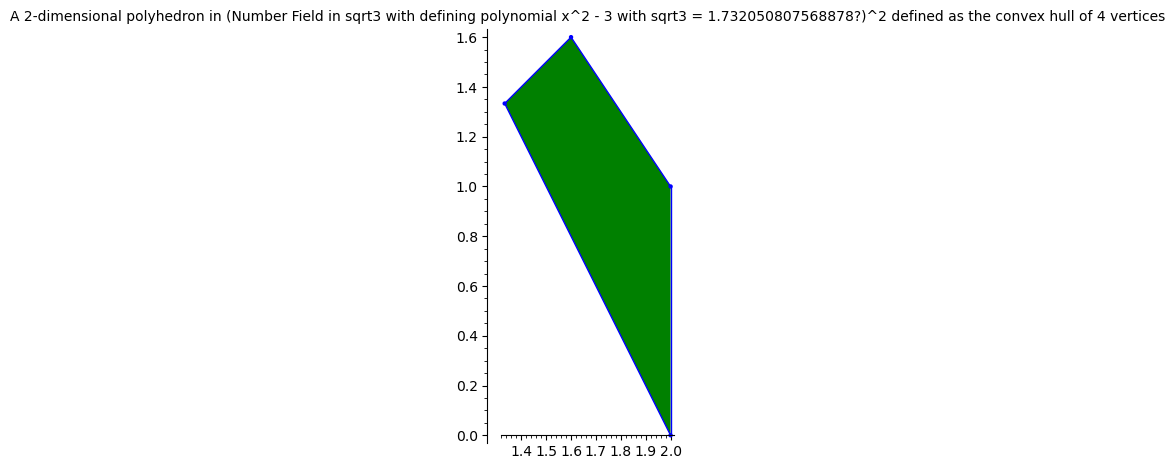

In [92]:
cell3 = attracting_orbit.cell(3)
cell3

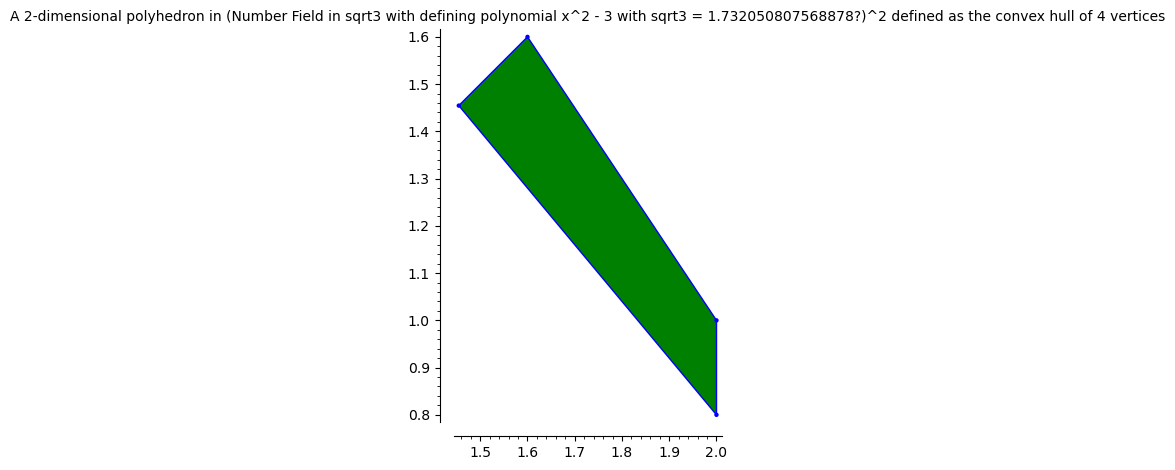

In [93]:
cell6 = attracting_orbit.cell(6)
cell6

Because the combinatorics have period three, the intersection of the third cell with its image under the inverse of $g_3$ (the affine action of the map to the third power on a neighborhood of our starting point) should give the sixth cell:

In [94]:
cell6 == cell3.intersection(~g3*cell3)

True

Here we build a line segment of the attracting line that crosses the cell.

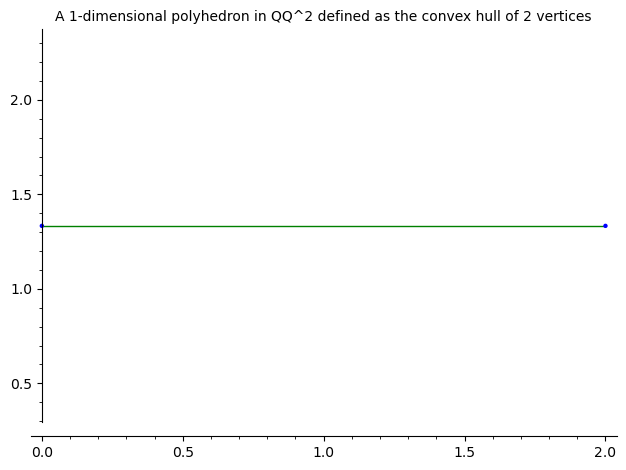

In [95]:
line_segment = Polyhedron(vertices=[(0, 4/3), (2, 4/3)])
line_segment

This is the portion of the line in the sixth cell. This should be the attracting set.

(A vertex at (16/9, 4/3), A vertex at (14/9, 4/3))


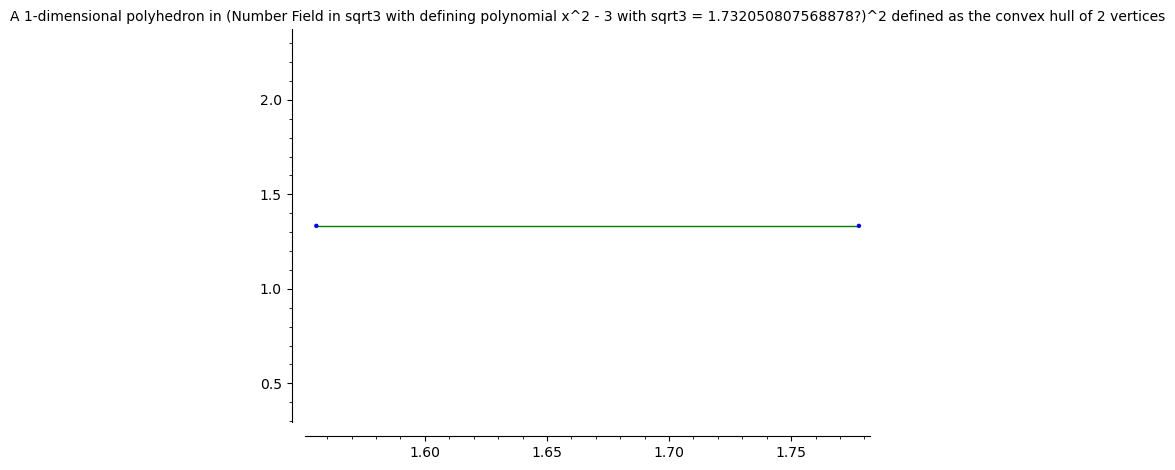

In [96]:
attracting_segment = line_segment.intersection(cell6)
print(attracting_segment.vertices())
attracting_segment

We thicken the segment to a strip along the attracting (slope -1) direction. If the dynamics were linear, this whole infinite strip would be in the attracting set of the map.

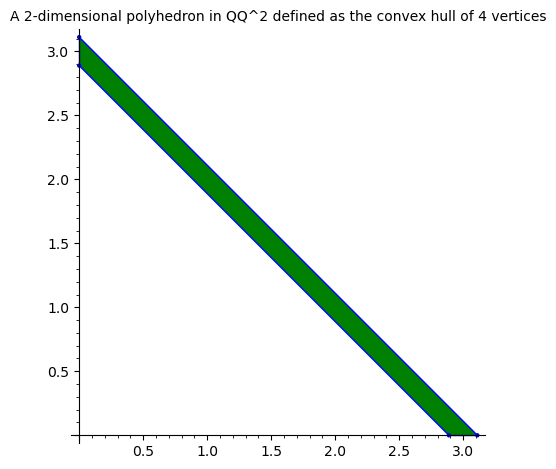

In [97]:
strip = Polyhedron(vertices=[(16/9+4/3, 0), (0, 16/9+4/3), (14/9+4/3, 0), (0, 14/9+4/3)])
assert strip.intersection(line_segment) == attracting_segment
strip

The strip intersected with the sixth cell will gives the set of points in the intermediate basin of attraction.

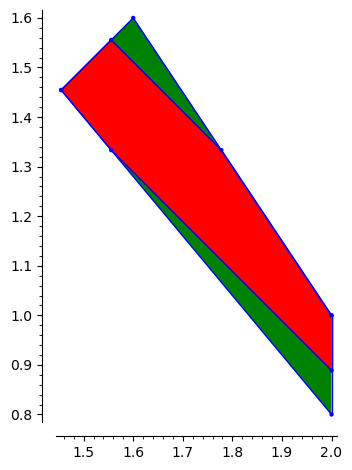

In [98]:
basin0 = strip.intersection(cell6)
cell6.plot() + basin0.plot(fill='red')

We quickly check that our proposed basin is mapped into itself by the linear action of $g_3$:

True


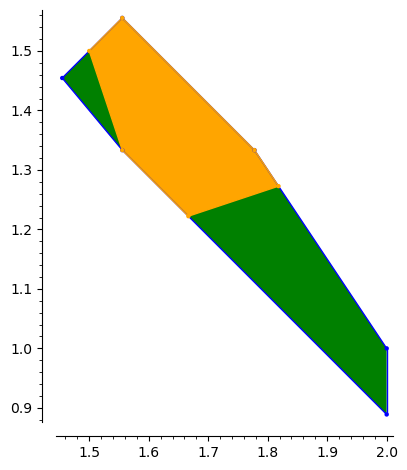

In [99]:
print((g3 * basin0).intersection(basin0) == g3 * basin0)
basin0.plot() + (g3 * basin0).plot(color='orange')

Now if we want to find more of the basis, we can pull it back under the map. We don't have a class for subsets of `PolyhedralUnions` but we can define an immersion, which has the same information.

In [100]:
basin0_union = finite_polytope_union(2, QQ, {0: basin0})

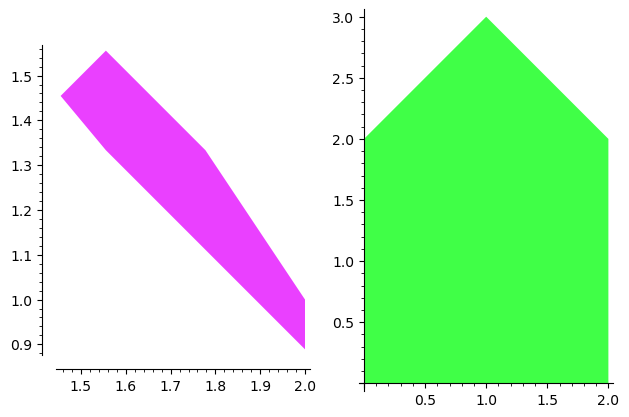

In [101]:
basin0_immersion = Immersions(pentagon_union)(basin0_union)
basin0_immersion.plot()

Now we can pull back under the map. First we define the inverse of f.

In [102]:
fi = ~f
fi

Piecewise affine map from disjoint union of 1 nonoverlapping polyhedra in QQ^2 to disjoint union of 1 nonoverlapping polyhedra in QQ^2

Now we compute the product $f^{-45} \circ i$, where $i$ is our immersion. The image will be an approximation of the basin of the segment under $f^3$. (In the limit as the exponent increases, while staying a multiple of 3, we get the full basin.)

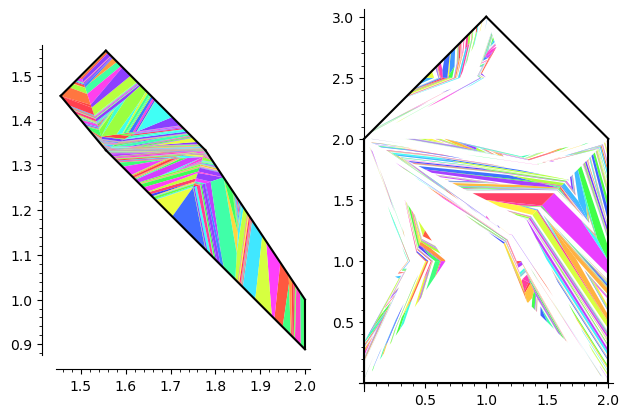

In [103]:
basin_immersion = basin0_immersion
for i in range(45):
    basin_immersion = fi*basin_immersion
basin_immersion.plot()

A bigger set will be attracted to the orbit of the line segment. Color coded by the period of the segment (3). We attempt to draw it here:

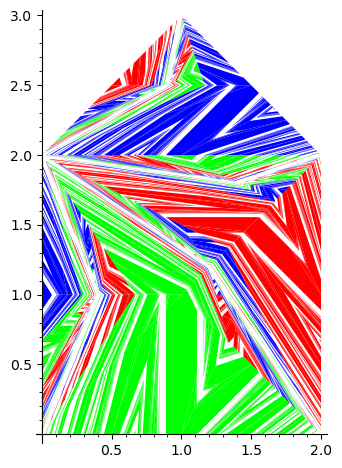

The total volume of the basin is 3.27031993178043 out of a volume of 5 for the whole domain.


In [104]:
basin_plt = basin_immersion.affine_homeomorphism().codomain().plot(fill=hue(0))
volume_total = basin_immersion.affine_homeomorphism().codomain().volume()
basin_immersion_temp = basin_immersion

for j in range(1, 3): 
    basin_immersion_temp = fi*basin_immersion_temp
    basin_plt +=  basin_immersion_temp.affine_homeomorphism().codomain().plot(fill=hue(j/3))
    volume_total += basin_immersion_temp.affine_homeomorphism().codomain().volume()
show(basin_plt)
print(f'The total volume of the basin is {volume_total.n()} out of a volume of 5 for the whole domain.')

We can choose a new point, trying to avoid the basin:

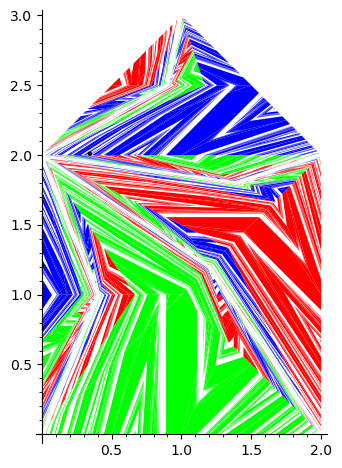

In [105]:
new_point = pentagon_union.point((1/3 + 1/100, 2 + 1/99))
basin_plt + point2d([new_point.position()], color='black')

In [106]:
new_orbit = Orbit(f, new_point, StopCriterion.PERIODIC)

In [107]:
new_orbit.iterate(1000)

False

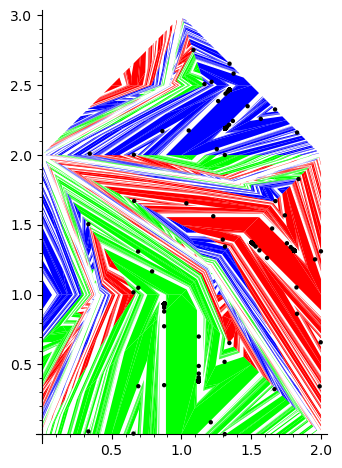

In [108]:
basin_plt + point2d(new_orbit.orbit(position_only=True), color='black')

In [109]:
for pt in list(new_orbit.orbit(partitioned=True))[-20:]:
    print(pt.label(), pt.position().n())

2 (1.34294034090909, 2.46686079545455)
1 (0.876079545454545, 0.933721590909091)
0 (1.50431818181818, 1.37176136363636)
2 (1.31411931818182, 2.19019886363636)
0 (1.12392045454545, 0.380397727272727)
0 (1.80980113636364, 1.31411931818182)
2 (1.34294034090909, 2.46686079545455)
1 (0.876079545454545, 0.933721590909091)
0 (1.50431818181818, 1.37176136363636)
2 (1.31411931818182, 2.19019886363636)
0 (1.12392045454545, 0.380397727272727)
0 (1.80980113636364, 1.31411931818182)
2 (1.34294034090909, 2.46686079545455)
1 (0.876079545454545, 0.933721590909091)
0 (1.50431818181818, 1.37176136363636)
2 (1.31411931818182, 2.19019886363636)
0 (1.12392045454545, 0.380397727272727)
0 (1.80980113636364, 1.31411931818182)
2 (1.34294034090909, 2.46686079545455)
1 (0.876079545454545, 0.933721590909091)


We seem to have found another attracting periodic orbit. It also has period six but seems to have combinatorics $\overline{020021}$ (repeating). We could likewise analyze it...